# Lecture 10 - Systems of linear equations

Many problems you might want to solve with computation can be formed into <a href="https://en.wikipedia.org/wiki/System_of_linear_equations">systems of linear equations</a>. Here is a simple example:

$$
\begin{array}{ccccccc} 
3x & + & 2y & - &  z & = & 1\\
2x & - & 2y & + & 4z & = & -2\\
-x & + & \frac{1}{2}y & - & z & = & 0
\end{array}
$$

(By the way, the solution is $x=1,y=-2,z=-2$)

On paper the method for finding the solution is to solving for one variable at a time. Computationally, the way to find the solution is to convert the system into a matrix and vector multiplicaion.

$$
\begin{array}{} 
3x_0 & + & 2x_1 & - &  x_2  \\
2x_0 & - & 2x_1 & + & 4x_2 \\
-x_0 & + & \frac{1}{2}x_1 & - & x_2 
\end{array}
=
\begin{bmatrix}
    3 &  2 & -1  \\
    2 & -2 &  4 \\
   -1 & \frac{1}{2} & -1  
\end{bmatrix}
\begin{bmatrix}
    x_0  \\
    x_1  \\
    x_2   
\end{bmatrix}
=
\begin{bmatrix}
    1  \\
    -2  \\
    0   
\end{bmatrix}
$$
The general form of this equation is $\pmb{A}\vec{x}=\vec{b}$ One possible solution is $\vec{x}=\pmb{A}^{-1}\vec{b}$ using linear algebra.

#### Why is this important?

Many types of problems can be put in the form of systems of linear equations, such as the expectation values of quantum mechanics, to computer game graphics. 

Condsider the following. We have been working with analytical functions like $f(x)$, which are very likely continuous and differentiable in some region. To work with such functions, we have to convert them to data arrays like $y_i=f(x_i)$. This is called [*discretization*][1], which is breaking up the continuous function into pieces.

Once you have your data arrays $x_i$ and $y_i$ however, what is to keep you from treating them as vectors, like $\vec{x}=(x_0,x_1,x_2,\ldots x_n)$?

Consider the differentiation of a function using the forward difference form. 
$$
\frac{\partial f(x)}{\partial x} \approx \frac{f(x_{i+1})-f(x_{i})}{h} = \frac{y_{i+1}-y_{i}}{h}
$$
You can see how this is similar to a system of linear equations
$$
\frac{\partial f(x)}{\partial x} \approx
\pmb{D}\vec{y} = 
\frac{1}{h}
\begin{bmatrix}
   -1 &  1 &  0 &  0 & \dots &  0 &  0 &  0 \\
    0 & -1 &  1 &  0 & \dots &  0 &  0 &  0 \\
    0 &  0 & -1 &  1 & \dots &  0 &  0 &  0 \\
    \vdots & \vdots &\vdots &\vdots &\dots &\vdots &\vdots &\vdots \\
    0 &  0 &  0 &  0 & \dots &  0 & -1 &  1 \\    
    0 &  0 &  0 &  0 & \dots &  0 &  0 & -1 \\
\end{bmatrix}
\begin{bmatrix}
    y_0  \\
    y_1  \\
    y_2   \\
    \vdots \\
    y_{n-2} \\
    y_{n-1}
\end{bmatrix}
$$
Now the matrix $\pmb{D}$ is the same as taking the derivative. 

If we had a right hand side to form a complete equation $\pmb{D}\vec{y}=\vec{b}$, where $\vec{b}$ was known at all points $\vec{x}$, we could solve for $\vec{y}(\vec{x})$ also using linear algebra. This way we could solve many differential equations by turning them into matrix-vector equations. This is the method of [*finite difference approxmation*][2] for solving partial differential equations

[1]: https://en.wikipedia.org/wiki/Discretization
[2]: https://en.wikipedia.org/wiki/Finite_difference_method

#### What's the problem with this?

Inverting matricies like $\pmb{A}$ or $\pmb{D}$, escpcially when they are very large, can be stupid tedious, and probably should be avoided.

#### Gaussian elimination

Let's look at the original problem of linear equations. In linear algebra, [Gaussian elimination][1] (also known as row reduction) is an algorithm for solving systems of linear equations.

Because you can
* multiply any equation by a constant, or
* take linear combination of the equations,

and not change the results, Gaussian elimination is a series of steps using these facts to convert the matrix $\pmb{A}$ into an [*upper-triangular matrix*][2], from which its easy to extract the answers by [*back substitution*][3]. Here is my function to do that.

[1]: https://en.wikipedia.org/wiki/Gaussian_elimination
[2]: https://en.wikipedia.org/wiki/Triangular_matrix
[3]: https://en.wikipedia.org/wiki/Triangular_matrix#Forward_and_back_substitution

In [10]:
import numpy
#
# Gaussian Elimination
# This function solves the equation Ax=b for x.
# It expects numypy arrays A(NxN) and b(N) and returns x(N).
# I am not checking that the arrays are all the same size. (I should.)
#
def gauss_elim(A,b):
    N = b.size
    #
    # Loop over each row, 0 to N-1
    #
    for m in range(N):
        #
        # Divide each element on the row by the diagonal element of that row.
        # This means A[m,m] = 1 when done.
        # (Do the same to b.)
        #
        div = A[m,m]
        A[m,:] /= div
        b[m] /= div
        #
        # Now for each row after row m, (here called row i>m)
        # 1. Multiply row m by the first non-zero element in row i.
        # 2. Subract the result from row i.
        # Now the first non-zero element has become zero, and
        # we did not change the answers at all.
        # As you work through the rows, everything below the diagonal
        # will turn into zero.
        # (Do the same to b.)
        #
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            b[i] -= mult*b[m]
    # ----- END LOOP TO CHANGE A and b
    #
    # Now we have:
    # Ax = | 1 a1 a2 a3 | x1    b1
    #      | 0  1 a4 a5 | x2 =  b2
    #      | 0  0  1 a6 | x3    b3
    #      | 0  0  0 1  | x4    b4
    #
    # Finally, x4 = b4 to start, and  
    # x3 = b3 - x4*a6, and
    # x2 = b2 - x3*a4 - x4*a5, and 
    # x1 = b1 - x2*a1 - x3*a2 - x4*a3
    # Repeat backwards through the matix until all the x are found.
    # This is called back substitution.
    # 
    # 
    # Create an array to hold the answers.
    #
    x = numpy.zeros(N,float)
    #
    # Loop backwards through the matrix.
    #
    for m in range(N-1,-1,-1):
        #
        # The first answer x is easy.
        #
        x[m] = b[m]
        #
        # A[m,i] * x[i] is matrix row m times vector x.
        # There is no need to loop over the entire row, as the A[m,i<=m] is zero.
        #
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    # --- END BACKSUBSTITUTION LOOP
    return x

#### Example 1
Use the above program to solve the system of linear equations:
$$
\begin{array}{rrrrrrc} 
  x & + & 2y &   &    & = &  1 \\
 3x & + & 2y & + & 4z & = &  7 \\
-2x & + &  y & - & 2z & = & -1 \\
\end{array}
$$
You should get whole numbers for $\vec{x}$.

In [11]:
A = numpy.array([[ 1,  2,  0 ],
                 [ 3,  2,  4 ],
                 [-2,  1, -2 ]], dtype=float)
b = numpy.array([ 1, 7, -1 ],dtype=float)
x = gauss_elim(A, b)
print(x)

[-1.  1.  2.]


#### Example 2
What happens when you use this as the first equation instead?
$$\begin{array}{rrc}   2y  & = &  1 \end{array}$$
Exactly which step in `gauss_elim` failed, and why?

In [20]:
A = numpy.array([[ 0,  2,  0 ],
                 [ 3,  2,  4 ],
                 [-2,  1, -2 ]], dtype=float)
b = numpy.array([ 1, 7, -1 ],dtype=float)
x = gauss_elim(A,b)
print(x)

[nan nan nan]


<ipython-input-10-b3898976873c>:20: RuntimeWarning: divide by zero encountered in true_divide
  A[m,:] /= div
<ipython-input-10-b3898976873c>:20: RuntimeWarning: invalid value encountered in true_divide
  A[m,:] /= div
<ipython-input-10-b3898976873c>:21: RuntimeWarning: divide by zero encountered in double_scalars
  b[m] /= div
<ipython-input-10-b3898976873c>:21: RuntimeWarning: invalid value encountered in double_scalars
  b[m] /= div


#### Pivoting

The solution to the error above is to swap around the equations to avoid this problem. This is called pivoting.

**Pivoting algotrithm:** When on the $m$th row (before dividing the row by $A_{m,m}$), compare the absolute value of the $m$th element ($|A_{m,m}|$) to the $m$th element of all the rows below it, and find the row with the largest (positive or negative) value. Then swap the $m$th row with that row. Swap the rows of $\vec{b}$ also.

#### Example 3

Both `numpy` and `scipy` have extensive functions for linear algebra. The basic replacement for our gaussian elimination function is [`numpy.linalg.solve`][1] and [`scipy.linalg.solve`][2].

Find the solution to to the equation above using these two functions.

[1]: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html

In [13]:
import scipy
import scipy.linalg

A = numpy.array([[ 1,  2,  0 ],
                 [ 3,  2,  4 ],
                 [-2,  1, -2 ]], dtype=float)
b = numpy.array([ 1, 7, -1 ],dtype=float)

x = scipy.linalg.solve(A,b)
print(x)
x = numpy.linalg.solve(A,b)
print(x)

[-1.  1.  2.]
[-1.  1.  2.]


#### LU decomosition

In numerical analysis and linear algebra, [lower–upper (LU) decomposition][1], or factorization, factors a matrix as the product of a lower triangular matrix and an upper triangular matrix. 
$$\pmb{A}=\pmb{L}\pmb{U}$$
If pivoting is needed, then a perturbation matrix is also required:
$$\pmb{P}\pmb{A}=\pmb{L}\pmb{U}$$
If there is no pivoting, then $\pmb{P}=\pmb{I}$, and the lower triangle matrix is often exactly what we would get from Gaussian elimination working in the opposite direction.

We could then solve for $\vec{x}$ by the following. Restating the problem: $$\pmb{A}\vec{x}=\left[\pmb{L}\pmb{U}\right]\vec{x}=\vec{b}$$
First, solve $\pmb{L}\vec{y}=\pmb{P}\vec{b}$ for $\vec{y}$, then solve $\pmb{U}\vec{x}=\vec{y}$ for $\vec{x}$

#### Example 4

Use [`scipy.linalg.lu`][2] to find the LU-decomposition of the matrix 
$$
\begin{bmatrix}
    4 & 3 \\
    6 & 3 
\end{bmatrix}
$$

[1]: https://en.wikipedia.org/wiki/LU_decomposition
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html]

In [14]:
A = numpy.array([[ 4,  3 ],
                 [ 6,  3 ]], dtype=float)
P,L,U = scipy.linalg.lu(A)
print ("A:")
print (A)
print ("P:")
print (P)
print ("L:")
print (L)
print ("U:")
print (U)

A:
[[4. 3.]
 [6. 3.]]
P:
[[0. 1.]
 [1. 0.]]
L:
[[1.         0.        ]
 [0.66666667 1.        ]]
U:
[[6. 3.]
 [0. 1.]]


#### Inverting matricies

Sometimes there may be reason you simply must invert a matrix. We can use the methods above to do it. Consider when solving $\pmb{A}\vec{x}=\vec{b}$ that you can invert the matrix by solving the following equation first;
$$\pmb{A}\pmb{X}=\pmb{I}.$$
Then we see that the solution is the inverted matrix that we need, $\pmb{X}=\pmb{A}^{-1}$. Finally we have
$$
\vec{x} = \pmb{A}^{-1}\vec{b}
$$

#### Example 5 

Use [`sciy.linalg.solve`][1] on the matrix from example 1, and an identity matrix, to find the inverse of the problem's matrix. Then use it to solve for `x` using [`numpy.dot`][3].

Use [`scipy.linalg.inv`][2] on the matrix from example 1, and an identity matrix, to find the inverse of the problem's matrix. Then use it to solve for `x` using [`numpy.dot`][3].

[1]: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html
[3]: https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [15]:
A = numpy.array([[ 1,  2,  0 ],
                 [ 3,  2,  4 ],
                 [-2,  1, -2 ]], dtype=float)
b = numpy.array([ 1, 7, -1 ],dtype=float)

I = numpy.identity(3,dtype=float)

Ainv = scipy.linalg.solve(A,I)
x = numpy.dot(Ainv,b)
print("Inverting by solving A'A=I    :", x)

Ainv = scipy.linalg.inv(A)
x = numpy.dot(Ainv,b)
print("Inverting by scipy.linalg.inv :", x)

Inverting by solving A'A=I    : [-1.  1.  2.]
Inverting by scipy.linalg.inv : [-1.  1.  2.]


#### Example 6


#### Model of phonons in a solid

Consider a linear string of $N$ identical masses $m$ connected by identical springs with spring constant $k$, like this

<img src="images/masses.png" width=700/>

If you push on one of the masses, they will all move around their equilibrium position in vibration mode of specific frequency. 

Let $\delta$ be the displacement of the mass from its equilibrium position. Then the equation of motion of the system is given by Newton's laws;
$$
m\frac{\mathrm{d}^2\delta_i}{\mathrm{d}t^2}=k\left(\delta_{i+1}-\delta_{i}\right)+k\left(\delta_{i}-\delta_{i-1}\right) +F_i
$$
where $F_i$ is any additional external force added to mass $i$. 

Now we drive the motion of the masses by applying a harmonic (periodic) force only to the first mass;
$$
F_1 = C e^{i\omega t},\ \ F_i=0\textrm{ for }i>1
$$
where $C$ is the constant amplitude of the force, and $\omega$ is the frequency.

The solution of the mass's motion will be of the form 
$$
\delta_i = a_i e^{i\omega t}
$$
where $a_i$ is the amplitude of their displacement.

The equations of motion for the masses at the two ends of the chain are;
$$
m\frac{\mathrm{d}^2\delta_1}{\mathrm{d}t^2}=k\left(\delta_{2}-\delta_{1}\right) +F_1
$$
$$
m\frac{\mathrm{d}^2\delta_N}{\mathrm{d}t^2}=k\left(\delta_{N-1}-\delta_{N}\right)
$$

Overall, the equations of motion become;
$$ 
\begin{array}{}
-m\omega^2a_1 &=& k\left(a_2-a_1\right)+C, \\
-m\omega^2a_i &=& k\left(a_{i+1}-a_{i-}\right)+k\left(a_{i-1}-a_{i}\right),\\
-m\omega^2a_N &=& k\left(a_{N-1}-a_{N}\right) 
\end{array}
$$
where the middle equation applies for masses $2\leq i\leq N-1$. Rearranging the equations yields
$$ 
\begin{array}{}
\left(\alpha -k\right)a_1 - ka_2 &=& C \\
\alpha a_i - k \alpha_{i-1} - k \alpha_{i+1} &=& 0\\
\left(\alpha -k\right)a_N - ka_{N-1} &=& 0 \\
\end{array}
$$</font>
where $\alpha=2k-m\omega^2$.


Write a program that uses `numpy.linalg.solve` to find the maximum amplitudes $a_i$ of each mass. Make a plot of the amplitudes as a function of mass number $i$. Use $N=50$, $m=1$, $k=6$, $C=0.1$, and $\omega=2$.

Our matricies and vectors look like this:
$$
\begin{bmatrix}
    \alpha-k &     -k &        &        &        \\
          -k & \alpha &     -k &        &        \\
             &     -k & \alpha &     -k &        \\
             &        & \ddots & \ddots & \ddots \\
             &        &        &     -k & \alpha &     -k & \\
             &        &        &        &     -k & \alpha-k
\end{bmatrix}\begin{bmatrix}
    a_{1} \\
    a_{2} \\
    a_{3} \\
    \vdots \\
    a_{N-1} \\
    a_{N}
\end{bmatrix}=
\begin{bmatrix}
    C \\
    0 \\
    0 \\
    \vdots \\
    0 \\
    0
\end{bmatrix}
$$

A:
[[ 2. -6.  0. ...  0.  0.  0.]
 [-6.  8. -6. ...  0.  0.  0.]
 [ 0. -6.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -6.  0.]
 [ 0.  0.  0. ... -6.  8. -6.]
 [ 0.  0.  0. ...  0. -6.  2.]]
b:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


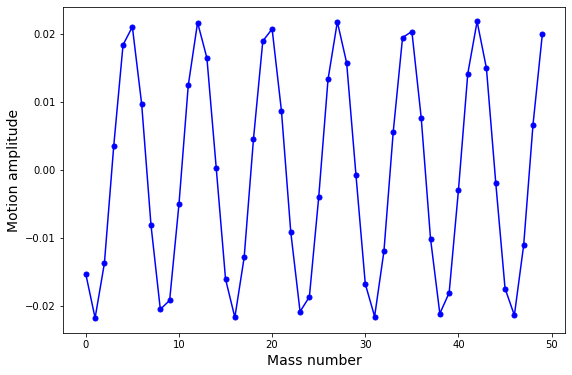

In [16]:
%matplotlib inline
import matplotlib.pyplot as plot
#
#
#
N = 50
m = 1.0
k = 6.0
C= 0.1
omega = 2.0
alpha = 2*k-m*omega*omega
#
# This loop runs from  0 to N-1.
# Notice how it fills A:
# 1. on the diagonal first, 
# 2. then the column one to the right,
# 3. the the row right beneat the diagonal.
#
A = numpy.zeros((N,N),dtype=float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
#
# 1. Element A[0,0] is wrong after the loop. Replace with the correct value.
# 2. Element A[N-1,N-1] has not yet been filled,
#
A[0,0] = alpha-k
A[N-1,N-1] = alpha-k
#
# It is maybe worth repeating here that a 1D array is already a vertical array.
#
b=numpy.zeros(N,dtype=float)
b[0] = C
#
# Solve for amplitudes a (data array x)
#
x = scipy.linalg.solve(A,b)
# Just for fun, I wanted to see if my solver gauss_elim_pivot works.
# It does!
#x = gauss_elim_pivot(A,b)

print(f"A:\n{A}")
print(f"b:\n{b}")

plot.figure(figsize=(9,6))
plot.plot(x,"b.-", markersize=10)
plot.xlabel("Mass number", fontsize=14)
plot.ylabel("Motion amplitude", fontsize=14)
plot.show()
plot.close()

#### Banded matricies

In the previous example, most of the matrix $\pmb{A}$ was filled with zeros. If it were a much bigger problem, that would be wasteful in terms of computer memory and all the useless calculations multiplying zeros. 

The structure of the the matrix $\pmb{A}$ is that all the non-zero elements are on *bands* along the diagonal. Three bands actually. It might be more useful to 
* store only the nonzero elements of the bands,
* adapt any solver methods to use only those elements.

This is very common, as a great many matricies are what is called *sparse*, as they contain very few non zero elements.

`scipy.linalg.solve_banded` can be used to solve very large systems where the only non-zero elements are on bands.

#### Example 7

#### A brief look at solving partial differential equations, or, "Integrals the hard way"

Let's revisit the idea that the matrix $\pmb{D}$ at the top of the notebook represents the first derivaive on an array of data. Let us create a high order polynomial $f(x)$, and it's derviatve $f'(x)$ over the range $(-1,3)$ to check the results. Let 

$$f(x)=0.1x^4-2x^3+4x^2+1$$ and $$\frac{\partial f}{\partial x} = f'(x)=0.4x^3+6x^2+8+1$$. In code we can create:

```python
     def f(x) :
         y = 0.1*x**4 - 2.0*x**3 + 4.0*x**2 + 1.0*x + 1.0
         return y

     def fp(x) :
         y = 0.4*x**3 - 6.0*x**2 + 8.0*x + 1.0
         return y
     
     N = 201
     x,h = numpy.linspace(-1.0,3.0,N,retstep=True)
     y = f(x)
     yp = fp(x)
```

Can you create the matrix `D` and use the `numpy.dot` function to test whether it can take the derivative of an array `y=f(x)`?

* Make a plot of the oringal function.
* Make another plot of:
    *  The true derivatve `fp(x)`
    *  The result of `D`, `yp`, and `numpy.dot`
    *  The result of using `scipy.misc.derivative`
    
Now see if you can restore the orginal function from it's derivative. Using an array `yp=fp(x)` created from the true derivative $f'(x)$, and the matrix `D`, can you use `scipy.linalg.solve` to get back an array that matches `y=f(x)`?

* Make a plot of
    * The oringal function
    * The result of `scipy.linalg.solve`


What do you observe? Why is that? What would happen if you created a second derivative from the central difference formula from the last assignment?

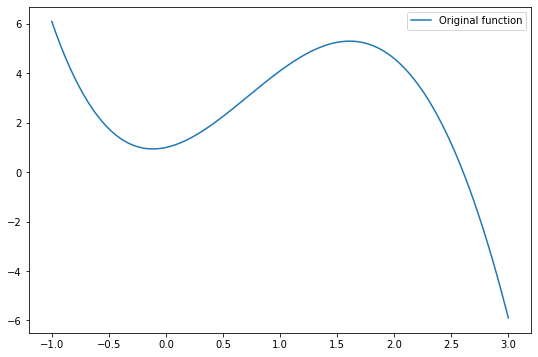

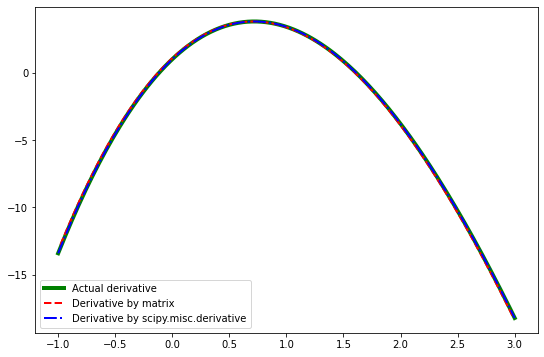

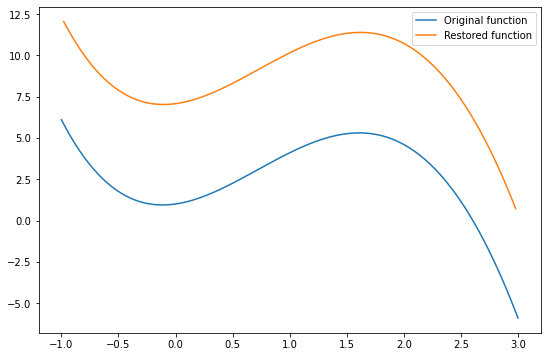

In [17]:
def f(x) :
    y = 0.1*x**4 - 2.0*x**3 + 4.0*x**2 + 1.0*x + 1.0
    return y

def fp(x) :
    y = 0.4*x**3 - 6.0*x**2 + 8.0*x + 1.0
    return y

N=201
x,h = numpy.linspace(-1.0,3.0,N,retstep=True)

#
# Create the derivative matrix D
#
D = numpy.zeros((N,N),dtype=float)
for r in range(N):
    D[r,r] = -1.0
    if (r+1)<=(N-1) : 
        D[r,r+1] =  1.0
D /= h

#
# Collect data arrays for plotting
#
y = f(x)               # Original function
yp = fp(x)             # Original derivative
Dy = numpy.dot(D,y)    # Derviative by matrix
import scipy.misc
scipy_yp = scipy.misc.derivative(f,x,dx=1e-5,n=1) # Derviative by scipy function

plot.figure(figsize=(9,6))
plot.plot(x,y,label="Original function")
plot.legend()
plot.show()
plot.close()

plot.figure(figsize=(9,6))
plot.plot(x,       yp,       "g-", linewidth=4, label="Actual derivative")
plot.plot(x[1:N-1],Dy[1:N-1],"r--", linewidth=2, label="Derivative by matrix")
plot.plot(x,       scipy_yp, "b-.", linewidth=2, label="Derivative by scipy.misc.derivative")
plot.legend()
plot.show()
plot.close()

# Now try to find y again using linear algebra
new_y = scipy.linalg.solve(D,yp)

plot.figure(figsize=(9,6))
plot.plot(x,y,label="Original function")
plot.plot(x[1:N-1],new_y[1:N-1],label="Restored function")
plot.legend()
plot.show()
plot.close()

The restored function has the correct shape, but is shifted from the original function by a constant; $f(x)-y=C$. This is because although using the `solve` method is the same as taking an integral, when you do take an integral, the result is only correct up to a constant:
$$
\int f'(x)\mathrm{d}x = f(x)+C
$$
So this method works, within a constant. A second derivative could be solved for by a single matrix as well, by up to a linear equation:
$$
\int\int f''(x)\mathrm{d}x^2 = f(x)+A\cdot x+B
$$
Boundary conditions placed on $f(x)$ (and on $f'(x)$ in the case of a second derivative.) would solve for these constants.

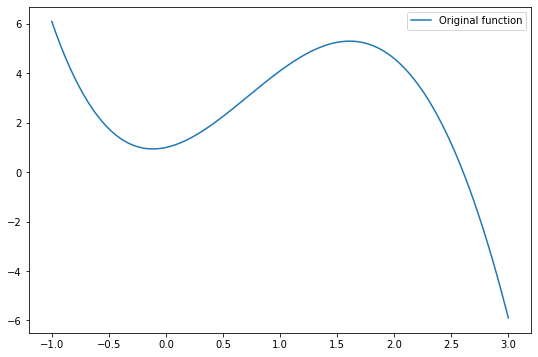

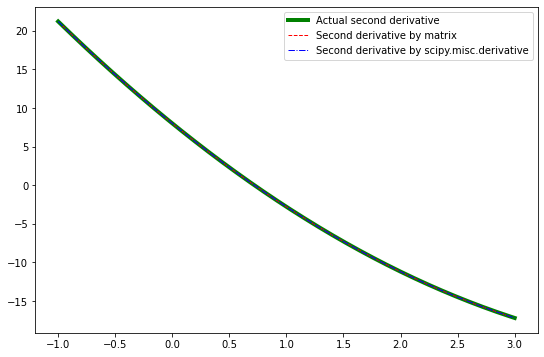

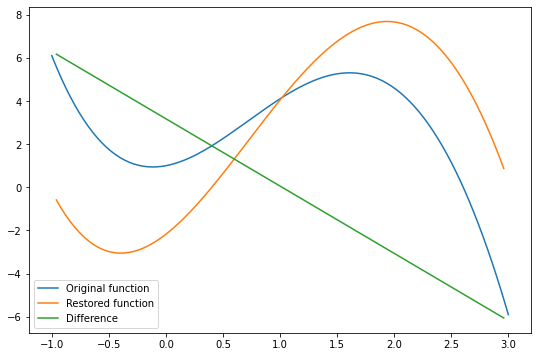

In [18]:
def f(x) :
    y = 0.1*x**4 - 2.0*x**3 + 4.0*x**2 + 1.0*x + 1.0
    return y

def fp(x) :
    y = 0.4*x**3 - 6.0*x**2 + 8.0*x + 1.0
    return y

def fpp(x) :
    y = 1.2*x**2 - 12.0*x + 8
    return y

N=201
x,h = numpy.linspace(-1.0,3.0,N,retstep=True)

#
# Create the second derivative matrix D2
#
D2 = numpy.zeros((N,N),dtype=float)
for r in range(N):
    D2[r,r] = -30.0
    if (r-1)>=0 : 
        D2[r,r-1] = 16.0
    if (r-2)>=0 : 
        D2[r,r-2] = -1.0
    if (r+1)<=(N-1) : 
        D2[r,r+1] = 16.0
    if (r+2)<=(N-1) : 
        D2[r,r+2] = -1.0
D2 /= 12*h*h

#
# Collect data arrays for plotting
#
y   = f(x)               # Original function
ypp = fpp(x)             # Original second derivative
D2y = numpy.dot(D2,y)    # Second derviative by matrix
scipy_ypp = scipy.misc.derivative(f,x,dx=1e-5,n=2) # Second derviative by scipy function

plot.figure(figsize=(9,6))
plot.plot(x,y,label="Original function")
plot.legend()
plot.show()
plot.close()

plot.figure(figsize=(9,6))
plot.plot(x,       ypp,       "g-",linewidth=4,label="Actual second derivative")
plot.plot(x[2:N-2],D2y[2:N-2],"r--",linewidth=1,label="Second derivative by matrix")
plot.plot(x,       scipy_ypp, "b-.",linewidth=1,label="Second derivative by scipy.misc.derivative")
plot.legend()
plot.show()
plot.close()

new_y = scipy.linalg.solve(D2,ypp)

plot.figure(figsize=(9,6))
plot.plot(x,y,label="Original function")
plot.plot(x[2:N-2],new_y[2:N-2],label="Restored function")
plot.plot(x[2:N-2],y[2:N-2]-new_y[2:N-2],label="Difference")
plot.legend()
plot.show()
plot.close()

The matrix `D2` worked taking the second derivative. I cut the last two data points from the plot of the derivative, as there was an error in the endpoint. We also see the difference between the restored function and the original is a straight line, as expected.

To find the correct solution, we have to set the boundary conditions, in two steps

- Set the values of the second derivative `ypp` to their fixed values of `y` at known points.
- Remove the derivative from the rows of `D` where those known points by setting the whole row to zero and the diagonal to one.

This guarantees that those values of `y` do not change when D is inverted.  